In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import random
from typing import List

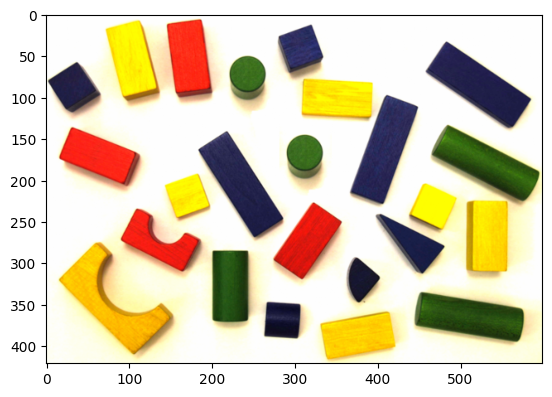

In [2]:
image=plt.imread("C:\Gazsi\Prog\\2023-2024\\3dComputerVision\Data\\bricks.png")
plt.imshow(image)

In [3]:
def distance(point:np.array,array:np.array):
    return np.linalg.norm(array-point,axis=1)

def plot_centroids(data,centroids)->None:
    fig,axs=plt.subplots(3,1)
    size=5
    axs[0].scatter(data[:,0],data[:,1],s=size)
    axs[0].scatter(centroids[:,0],centroids[:,1],s=size)
    axs[1].scatter(data[:,1],data[:,2],s=size)
    axs[1].scatter(centroids[:,1],centroids[:,2],s=size)
    axs[2].scatter(data[:,2],data[:,0],s=size)
    axs[2].scatter(centroids[:,2],centroids[:,0],s=size)


"""
Initializes the centroids in a way, so the k-means algorithm converges faster.
"""
def initialize_centroids(data:np.array,num_centroids:int,plot_centroids:bool=True)->np.array:
    first_centroid=data[random.randint(0,data.shape[0]-1)]
    centroids=[first_centroid]
    for _ in range(num_centroids-1):
        centroid_dists_stacked=np.zeros((len(centroids),data.shape[0]))
        for i,centroid in enumerate(centroids):
            dist=distance(centroid,data)
            centroid_dists_stacked[i]=dist**2
        distribution=np.min(centroid_dists_stacked,axis=0)
        distribution=distribution/np.sum(distribution)
        new_centroid_index=np.random.choice(np.linspace(0,data.shape[0]-1,data.shape[0],dtype=np.int32),p=distribution)
        centroids.append(data[new_centroid_index])
    centroids=np.array(centroids)
    if plot_centroids:
        plot_centroids(data,centroids)
    return centroids

"""
Calculates the final postions of the centroids on the vector. If replace_data is True, the detapoints are replaced with 
the values of the corresponding centroid.
"""
def k_means(data:np.array,num_centroids:int=5,maximum_diff:float=0.0001,max_iterations:int=100,replace_data:bool=True,initialization_method:str="kpp")->np.array:
    x,y=data.shape[0],data.shape[1]
    #Reshape data
    if data.ndim==3:
        data=np.reshape(data,(data.shape[0]*data.shape[1],data.shape[-1]))
    elif data.ndim==2:
        data=np.reshape(data,(data.shape[0]*data.shape[1],1))
    #Initialize centroids with selected algorithm
    if initialization_method=="kpp":
        centroids=initialize_centroids(data,num_centroids,plot_centroids=False)
    elif initialization_method=="random":
        indices=np.random.randint(0,data.shape[0]-1,num_centroids)
        centroids=np.take(data,indices,axis=0)
    print("Centroids initialized:\n",centroids)
    #List for separating the data into groups
    groups:List[List[np.array]]=[[] for x in range(num_centroids)]
    for j in range(max_iterations):  
        #Calculate distances beetween datapoint and centroids
        centroid_dists_stacked=np.zeros((num_centroids,data.shape[0])) 
        for i,centroid in enumerate(centroids):
            dist=distance(centroid,data)
            centroid_dists_stacked[i]=dist
        #Select the minimum distance
        group_indices=np.argmin(centroid_dists_stacked,axis=0)
        #Assign elements to groups, and calculate average
        for c,ind in enumerate(group_indices):
            groups[ind].append(data[c])
        new_centroids=np.array([np.sum(members,axis=0)/len(members) for members in groups])
        #Calculate maximum difference between new and current centroids
        deltas=np.linalg.norm(new_centroids-centroids,axis=1)
        centroids=new_centroids
        groups=[[] for x in range(num_centroids)]
        print("Iteration ",j," with max difference ",max(deltas))
        if max(deltas)<=maximum_diff:
            break
    #Replace datapoints with the etalon color    
    if replace_data:
        data=replace_colors(data,centroids)

    #Reshape image to original dimensions
    data=np.reshape(data,(x,y,data.shape[-1]))
    return centroids,data

def replace_colors(data,centroids):
    centroid_dists_stacked=np.zeros((len(centroids),data.shape[0]))
    for j,centroid in enumerate(centroids):
        dist=distance(centroid,data)
        centroid_dists_stacked[j]=dist
    group_indices=np.argmin(centroid_dists_stacked,axis=0)
    return np.take(centroids,group_indices,axis=0)
        

# Random initializtaion

In [4]:
centroids,img=k_means(image,initialization_method="random")

Centroids initialized:
 [[0.14901961 0.28235295 0.06666667]
 [0.99607843 0.8235294  0.6784314 ]
 [0.70980394 0.54509807 0.41960785]
 [0.13725491 0.12156863 0.30588236]
 [0.99607843 0.99607843 0.99607843]]
Iteration  0  with max difference  0.37556542353412314
Iteration  1  with max difference  0.042628005188326504
Iteration  2  with max difference  0.018221976385701687
Iteration  3  with max difference  0.011552158744286133
Iteration  4  with max difference  0.010117524860496836
Iteration  5  with max difference  0.00976703971257897
Iteration  6  with max difference  0.009339827140937576
Iteration  7  with max difference  0.009485993674432177
Iteration  8  with max difference  0.00724183762404172
Iteration  9  with max difference  0.007059785550925867
Iteration  10  with max difference  0.005366654052231852
Iteration  11  with max difference  0.004533638232362895
Iteration  12  with max difference  0.004560689135919673
Iteration  13  with max difference  0.004526553435143863
Iteration 

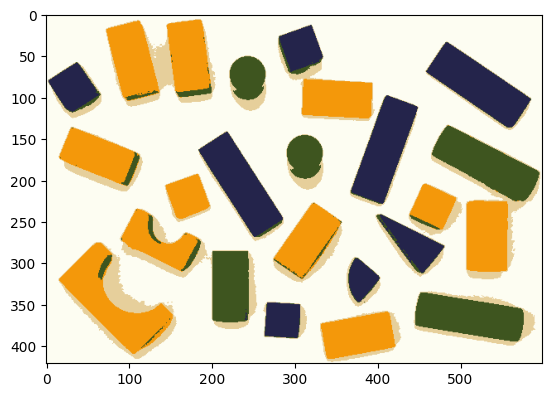

In [5]:
plt.imshow(img)

# k-means++ initialization 
Converges faster, and produces better results.

In [6]:
centroids,img=k_means(image,initialization_method="kpp")

Centroids initialized:
 [[0.99607843 0.99607843 0.99607843]
 [0.21960784 0.22352941 0.42352942]
 [0.99607843 0.9411765  0.        ]
 [0.14509805 0.22745098 0.06666667]
 [0.99607843 0.14117648 0.08627451]]
Iteration  0  with max difference  0.11983970588602007
Iteration  1  with max difference  0.03329595527260432
Iteration  2  with max difference  0.02724473318823945
Iteration  3  with max difference  0.02518906999356382
Iteration  4  with max difference  0.02247076757342306
Iteration  5  with max difference  0.020358997725732825
Iteration  6  with max difference  0.013519618953820763
Iteration  7  with max difference  0.007700986304272296
Iteration  8  with max difference  0.003822890260812964
Iteration  9  with max difference  0.002281652920567655
Iteration  10  with max difference  0.0010094694532654972
Iteration  11  with max difference  0.0005599311486284212
Iteration  12  with max difference  0.0002192258758874545
Iteration  13  with max difference  0.00011190795866665356
Iterati

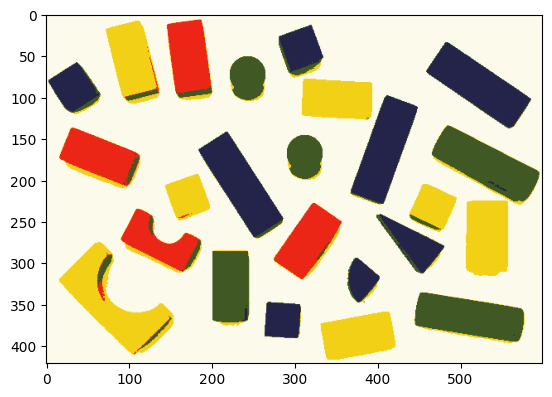

In [7]:
plt.imshow(img)